## Part 1

In [221]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import plotnine as pt
from sklearn.compose import ColumnTransformer

In [222]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [223]:
#Standardizing and dummifying potential predictor variables
insurance.dropna(inplace=True)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","smoker","region"]),
    ("standardize", StandardScaler(), ["age",  "bmi"])
  ],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [224]:
insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


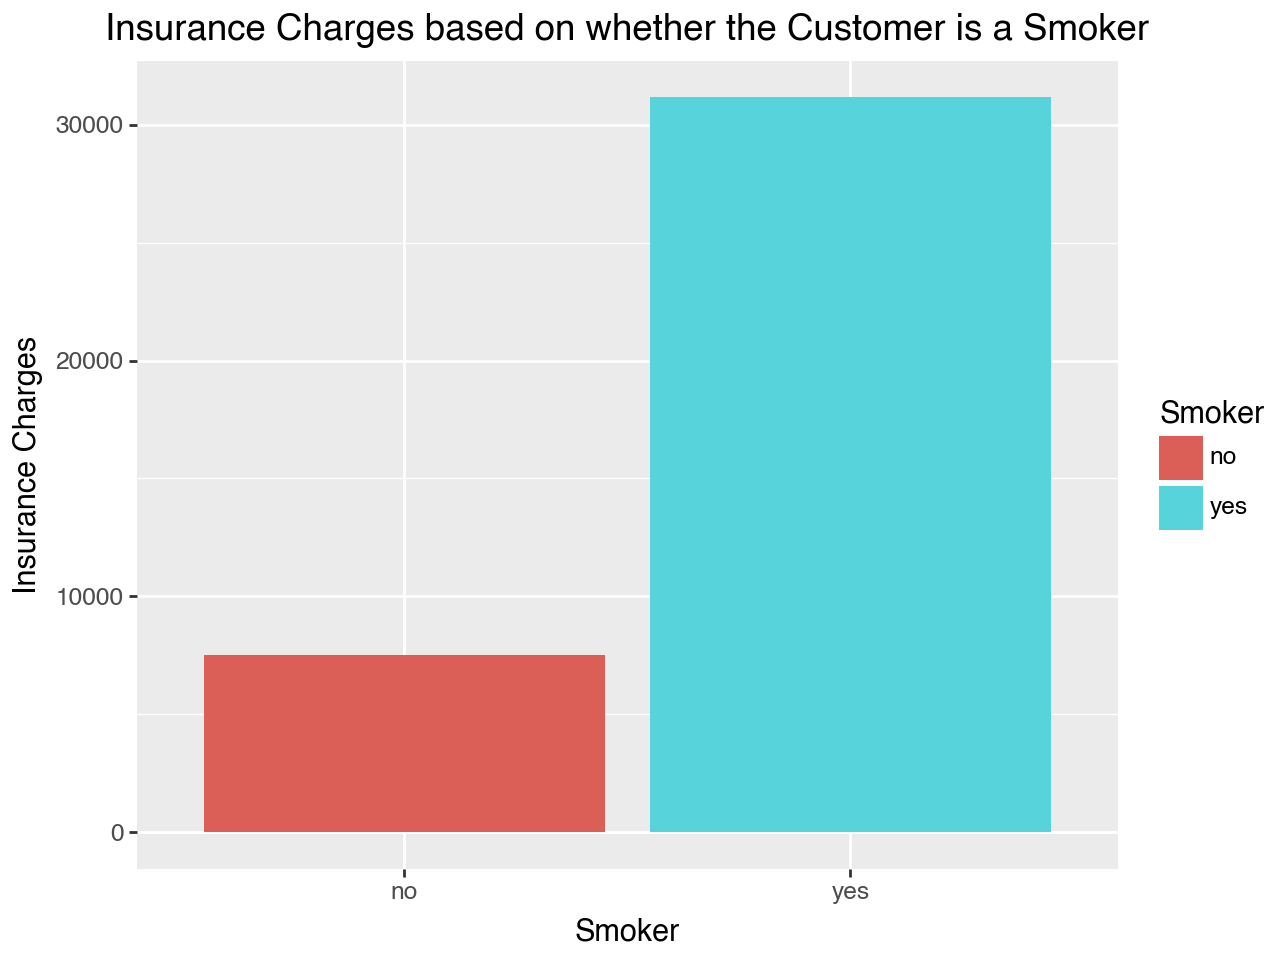

In [225]:
insurance2 = insurance.groupby("smoker")[["charges"]].mean().reset_index()

(pt.ggplot(insurance2, pt.aes(x = 'smoker', y = "charges",fill = "smoker"))
 + pt.geom_col()
 + pt.labs(title = "Insurance Charges based on whether the Customer is a Smoker",
           x = "Smoker",
           y = "Insurance Charges",
           fill = "Smoker"))

Here, we can see that smokers tend to have way higher insurance charges than non-smokers. From the graph, we can see that smokers have more than 3 times more charges than non-smokers. This is unlikely to be a coincidence as we know smoking is bad for your health.

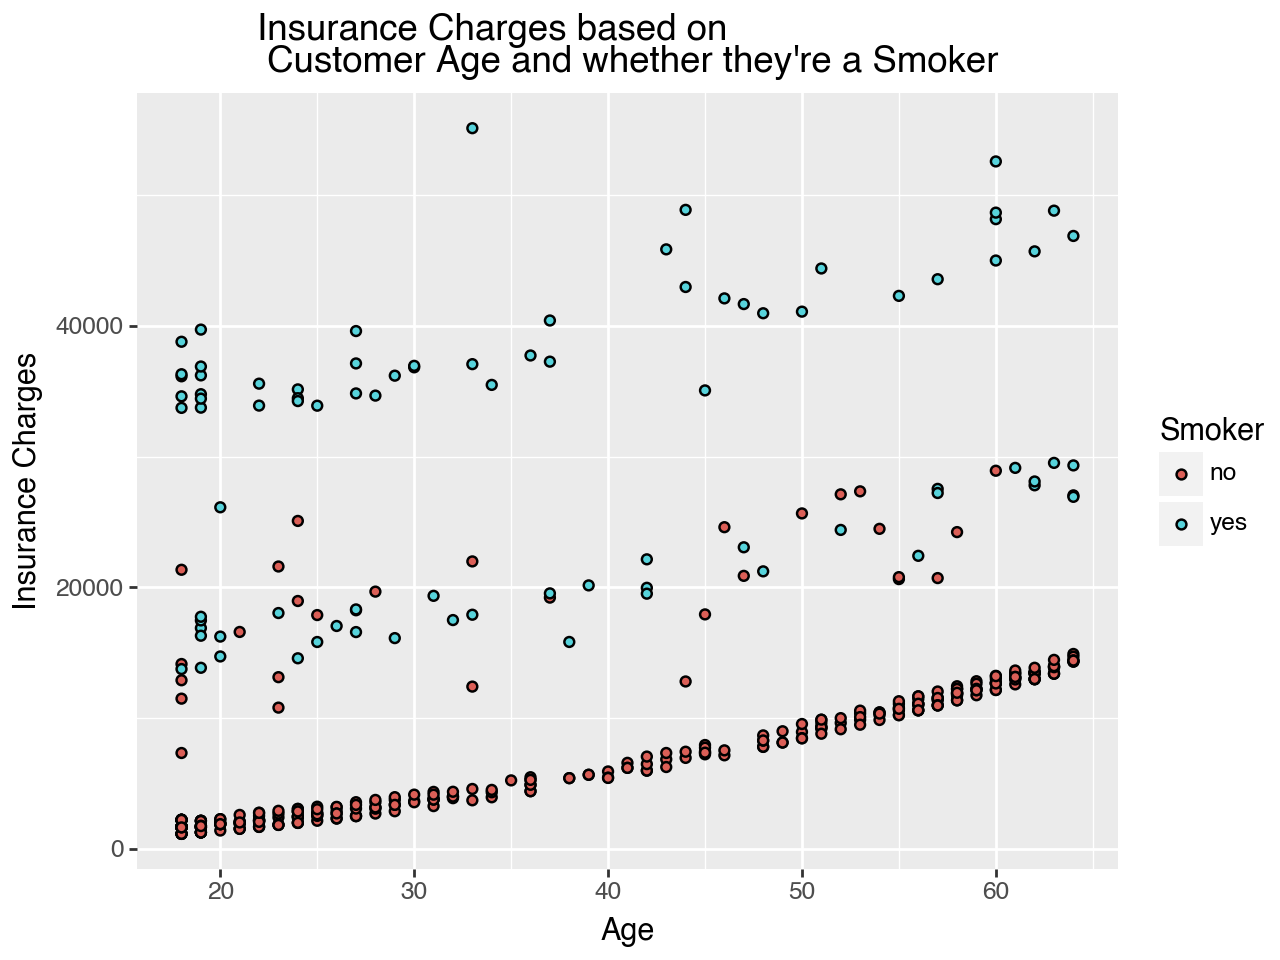

In [226]:
(pt.ggplot(insurance, pt.aes(x = 'age', y = "charges", fill = "smoker"))
 + pt.geom_point()
 + pt.labs(title = "Insurance Charges based on \n Customer Age and whether they're a Smoker",
           x = "Age",
           y = "Insurance Charges",
           fill = "Smoker"))

Here, we can see that generally, older people tend to have higher insurance charges than younger people. This is because health conditions are more common in older populations and everyone ends up having a health struggle at some point.

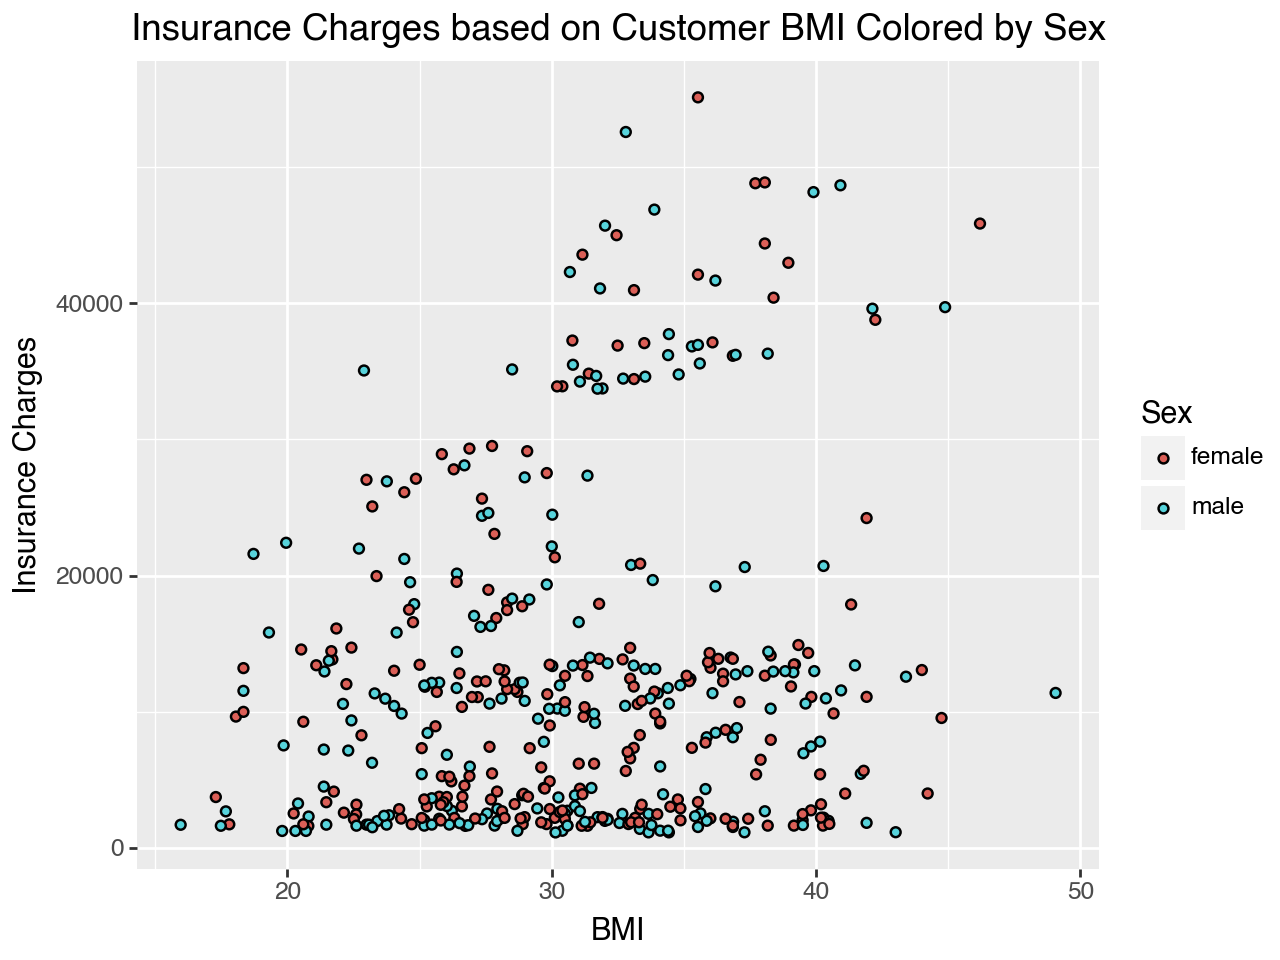

In [227]:
(pt.ggplot(insurance, pt.aes(x = 'bmi', y = "charges", fill = 'sex'))
 + pt.geom_point()
 + pt.labs(title = "Insurance Charges based on Customer BMI Colored by Sex",
           x = "BMI",
           y = "Insurance Charges",
           fill = "Sex"))

Here, we can see a weak positive correlation between BMI and Insurance Charges. People with a higher BMI tend to have more insurance charges. This is likely due to health conditions caused by overweight lifestyles.

## Part 2: Simple Linear Models

In [228]:
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [229]:
import sklearn as sk
# Linear Model
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X_train, y_train)

coefficients = lr_fitted.named_steps['linear_regression'].coef_
intercept = lr_fitted.named_steps['linear_regression'].intercept_

# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r1 = r2_score(y_test, y_test_pred)
test_mse = sk.metrics.mean_squared_error(y_test, y_test_pred)

print("R_Squared:", r1)
print("MSE:", test_mse)
print("Slope:", coefficients)
print("Intercept:", intercept)

R_Squared: 0.07457040400021098
MSE: 142591663.86040902
Slope: [3846.66517932]
Intercept: 12279.532672380807


Here, we can see a slope value of 3,738 and a intercept of around 12,000. This means a newborn baby is expected to have around $12,229 of insurance charges, and for every year increase of age, the insurance charges are expected to increase by about $3,738. Our R-Squared value is around 0.1 which means there is a very weak positive relationship between age and insurance charges, and the model is not a great fit.

In [230]:
import sklearn as sk
# Linear Model with Sex added
ct2 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct2),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X_train, y_train)

intercept2 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients2 = lr_fitted.named_steps['linear_regression'].coef_

# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r2 = r2_score(y_test, y_test_pred)
test_mse2 = sk.metrics.mean_squared_error(y_test, y_test_pred)


print("R_Squared:", r2)
print("MSE:", test_mse2)
print("Slope:", coefficients2)
print("Intercept:", intercept2)

R_Squared: 0.06986046746835017
MSE: 143317378.3714404
Slope: [3.81480057e+03 6.26696416e+17 6.26696416e+17]
Intercept: -6.266964156139227e+17


This model has a intercept of about $12,300. For every year increase in age, the insurance charges are expected to increase by $3,747, and being male causes is associated with about $1,500 more insurance charges than females. The R-Squared value is still quite low with a value of 0.08, and we have a very high MSE.

In [231]:
import sklearn as sk
# Linear Model with Smoker added
ct3 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummify", OneHotEncoder(), ["smoker"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct3),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X_train, y_train)



# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r3 = r2_score(y_test, y_test_pred)
test_mse3 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept3 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients3 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r3)
print("MSE:", test_mse3)
print("Slope:", coefficients3)
print("Intercept:", intercept3)

R_Squared: 0.809737447679197
MSE: 29315956.635730524
Slope: [  4019.7111036 -11502.9601043  11502.9601043]
Intercept: 19081.59267213422


This model has a higher intercept at around $19,700. For every year increase in age, the insurance charges are expected to increase by about $4,100. Being a smoker is associated with about $12,000 more insurance charges than baseline, while not smoking is associated with about -$12,000 insurance charges. This means that smoking is correlated with about $24,000 more in insurance charges. The R-Squared value is much higher for this model at about 0.77, and it has a smaller MSE than the model with age and sex as predictors. 

### 4: Best Fit
Model 3 with age and smoker as predictors was a much better fit for our data than Model 2 with age and sex as predictors. This can be seen with a much higher R-Squared value and a much lower MSE. This tells us that smoking is a far better indicator for insurance charges than sex is, even though sex may still be correlated with higher or lower insurance charges.

## Part 3: Multiple Linear Models

In [232]:
# Model with Age and BMI as Predictors
import sklearn as sk

# Linear Model with Smoker added
ct4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct4),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X_train, y_train)



# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r4 = r2_score(y_test, y_test_pred)
test_mse4 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept4 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients4 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r4)
print("MSE:", test_mse4)
print("Slope:", coefficients4)
print("Intercept:", intercept4)

R_Squared: 0.09468369875920002
MSE: 139492575.41781318
Slope: [3593.72676416 1722.71613371]
Intercept: 12279.532672380807


The MSE is smaller than the model in Part 2 Q1, and the R-Squared is larger than the one in the original model. This means that more of the variation is explained by this model because it has another predictor variable that can help explain the shape of the data.

In [233]:
# Model with Age and Age Square as Predictors
import sklearn as sk

insurance['age_square'] = insurance['age']**2
# Quadratic Model with Age Squared added
ct5 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct5),
  ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False)),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X_train, y_train)


# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r5 = r2_score(y_test, y_test_pred)
test_mse5 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept5 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients5 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r5)
print("MSE:", test_mse5)
print("Slope:", coefficients5)
print("Intercept:", intercept5)

R_Squared: 0.07050093216706566
MSE: 143218694.55213267
Slope: [4001.3343845  -639.96097543]
Intercept: 12919.493647815358


Even though we are using more variables here than before, our model is a worse fit. We have a lower R-Squared value and a higher MSE value than the original model in Part 2 Q1, so this model does not do as good of a job as the original linear model.

In [234]:
# Model with Degree 4 with Age as Predictor
import sklearn as sk
# Degree 4 Model for Age
ct6 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


deg4_pipeline = Pipeline(
  [("preprocessing", ct6),
  ('polynomial_features', PolynomialFeatures(degree=4, include_bias=False)),
  ("linear_regression", LinearRegression())]
)

deg4_fitted = deg4_pipeline.fit(X_train, y_train)


# Predictions for train and test sets
y_train_pred = deg4_fitted.predict(X_train)
y_test_pred = deg4_fitted.predict(X_test)


# Calculate MSE for training and testing data
r6 = r2_score(y_test, y_test_pred)
test_mse6 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept6 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients6 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r6)
print("MSE:", test_mse6)
print("Slope:", coefficients6)
print("Intercept:", intercept6)

R_Squared: 0.0796888498473407
MSE: 141803005.5844295
Slope: [4001.3343845  -639.96097543]
Intercept: 12919.493647815358


This model is the degree 4 model to predict insurance models from age. Once again, we have a lower R-Squared value and a higher MSE value than the original model in Part 2 Q1. This means this degree 4 model was a worse fit for the data than the simple linear model.

In [235]:
# Model with Degree 12 with Age as Predictor
import sklearn as sk
# Degree 12 Model for Age
ct7 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


deg12_pipeline = Pipeline(
  [("preprocessing", ct7),
  ('polynomial_features', PolynomialFeatures(degree=12, include_bias=False)),
  ("linear_regression", LinearRegression())]
)


deg12_fitted = deg12_pipeline.fit(X_train, y_train)


# Predictions for train and test sets
y_train_pred = deg12_fitted.predict(X_train)
y_test_pred = deg12_fitted.predict(X_test)


# Calculate MSE for training and testing data
r7 = r2_score(y_test, y_test_pred)
test_mse7 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept7 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients7 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r7)
print("MSE:", test_mse7)
print("Slope:", coefficients7)
print("Intercept:", intercept7)

R_Squared: 0.04581718963570702
MSE: 147022004.8558688
Slope: [4001.3343845  -639.96097543]
Intercept: 12919.493647815358


This model is the degree 12 model to predict insurance models from age. We have a lower R-Squared value and a higher MSE value than the original model in Part 2 Q1. This means this degree 12 model was a worse fit than the simple linear model.

In [ ]:
model_results1 = {
    "Model": ["Original Model", "Model 1", "Model 2", "Model 3", "Model 4"],
    "R_Squared": [r1, r4, r5, r6, r7],
    "MSE": [test_mse, test_mse4, test_mse5, test_mse6, test_mse7]
}

results_df1 = pd.DataFrame(model_results1)

print(results_df1)

            Model  R_Squared           MSE
0  Original Model   0.074570  1.425917e+08
1         Model 1   0.094684  1.394926e+08
2         Model 2   0.070501  1.432187e+08
3         Model 3   0.079689  1.418030e+08
4         Model 4   0.045817  1.470220e+08


### 5: Best Model
According to the R-Squared value and MSE, the model with Age and BMI as predictors was the best model. It had the highest R-Squared and the lowest MSE, so it is the best model. I would agree with the analysis because it's the only model that uses multiple predictor variables. Additionally, intuition would say that there is a positive correlation between BMI and insurance charges because heavier people tend to have more health issues. Still, there are almost certainly better models out there because the R-Squared value of 0.14 for this model is still quite low.

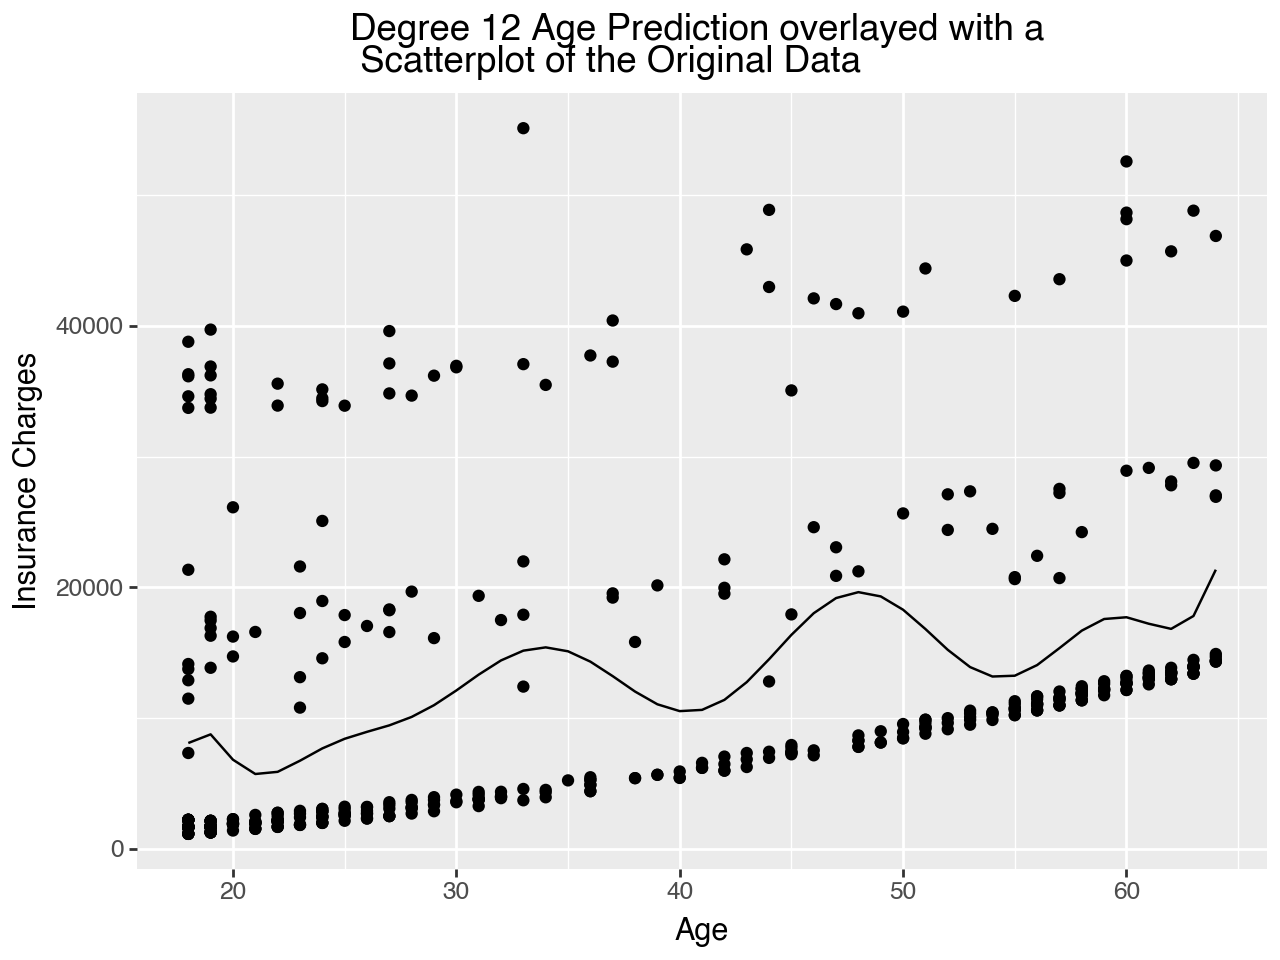

In [237]:
age_data = insurance[['age']]
insurance['Degree 12'] = deg12_fitted.predict(age_data)

(pt.ggplot(insurance, pt.aes(x='age'))
 + pt.geom_point(pt.aes(y = 'charges'))
 + pt.geom_line(pt.aes(y = 'Degree 12'))
 + pt.labs(title = "Degree 12 Age Prediction overlayed with a \n Scatterplot of the Original Data",
           x = "Age",
           y = "Insurance Charges")
)

From an initial glance, it looks like the degree 12 model might have overfit this data because it appears to be moving too much with the data which could give us inaccurate predictions.

## Part 4: New Data

In [238]:
newinsurance = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
newinsurance.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [239]:
#Setting our original data as the training data and the new data as the test data
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_test = newinsurance.drop("charges", axis = 1)
y_test = newinsurance["charges"]

In [240]:
# Model 1
import sklearn as sk

# Linear Model
ctnew = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ctnew),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r8 = r2_score(y_test, y_test_pred)
test_mse8 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept8 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients8 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r8)
print("MSE:", test_mse8)
print("Slope:", coefficients8)
print("Intercept:", intercept8)

R_Squared: 0.12236515675533055
MSE: 136077136.50195494
Slope: [3739.70080761]
Intercept: 12297.098118187932


In [241]:
# Model 2
import sklearn as sk

# Linear Model
ctnew1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ctnew1),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r9 = r2_score(y_test, y_test_pred)
test_mse9 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept9 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients9 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r9)
print("MSE:", test_mse9)
print("Slope:", coefficients9)
print("Intercept:", intercept9)

R_Squared: 0.14455628272331222
MSE: 132636406.1108129
Slope: [3535.35939421 1728.75207656]
Intercept: 12297.098118187932


In [242]:
# Model 3
import sklearn as sk

# Linear Model
ctnew2 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ctnew2),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r10 = r2_score(y_test, y_test_pred)
test_mse10 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept10 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients10 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r10)
print("MSE:", test_mse10)
print("Slope:", coefficients10)
print("Intercept:", intercept10)

R_Squared: 0.77183115650478
MSE: 35377541.24141633
Slope: [  3934.57463693   1717.24340827 -12021.91413825  12021.91413825]
Intercept: 19465.6176855464


In [243]:
# Model 4
import sklearn as sk


#Creating interactions by hand in order to be able to leave out Smoker variable

insurance['age_smoker'] = insurance['age'] * (insurance['smoker']=='yes').astype(int)
insurance['bmi_smoker'] = insurance['bmi'] * (insurance['smoker']=='yes').astype(int)
newinsurance['age_smoker'] = newinsurance['age'] * (newinsurance['smoker']=='yes').astype(int)
newinsurance['bmi_smoker'] = newinsurance['bmi'] * (newinsurance['smoker']=='yes').astype(int)

# Linear Model
ctnew3 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "age_smoker", "bmi_smoker"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ctnew3),
  ("linear_regression", LinearRegression())]
)

X_temp = insurance.drop("charges", axis = 1)
y_temp = insurance["charges"]


X_test_temp = newinsurance.drop("charges", axis = 1)
y_test_temp = newinsurance["charges"]

lr_fitted = lr_pipeline.fit(X_temp, y_temp)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test_temp)


# Calculate MSE for training and testing data
r11 = r2_score(y_test_temp, y_test_pred)
test_mse11 = sk.metrics.mean_squared_error(y_test_temp, y_test_pred)
intercept11 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients11 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r11)
print("MSE:", test_mse11)
print("Slope:", coefficients11)
print("Intercept:", intercept11)

R_Squared: 0.8400778135676983
MSE: 24795908.412643325
Slope: [ 4419.3821379    619.47836699 -1681.33354174 11684.44801783]
Intercept: 12297.098118187932


In [244]:
# Model 5
import sklearn as sk

# Linear Model
ctnew4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

X_train_dummified = ctnew2.fit_transform(X)
X_train_dummified

ct_inter1 = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction1", PolynomialFeatures(interaction_only = True), ["standardize__bmi", "dummify__smoker_yes"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ctnew4),
   ("interactions", ct_inter1),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
r12 = r2_score(y_test, y_test_pred)
test_mse12 = sk.metrics.mean_squared_error(y_test, y_test_pred)
intercept12 = lr_fitted.named_steps['linear_regression'].intercept_
coefficients12 = lr_fitted.named_steps['linear_regression'].coef_


print("R_Squared:", r12)
print("MSE:", test_mse12)
print("Slope:", coefficients12)
print("Intercept:", intercept12)

R_Squared: 0.8594886795699617
MSE: 21786256.866852555
Slope: [ 0.00000000e+00  4.21992619e+03  1.20537009e+04 -2.03548032e+02
 -3.63797881e-12  3.27260287e+01  1.20537009e+04  9.04143422e+03]
Intercept: 7440.919545454116


In [ ]:
model_results2 = {
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"],
    "R_Squared": [r8, r9, r10, r11, r12],
    "MSE": [test_mse8, test_mse9, test_mse10, test_mse11, test_mse12]
}

results_df2 = pd.DataFrame(model_results2)

print(results_df2)

     Model  R_Squared           MSE
0  Model 1   0.122365  1.360771e+08
1  Model 2   0.144556  1.326364e+08
2  Model 3   0.771831  3.537754e+07
3  Model 4   0.840078  2.479591e+07
4  Model 5   0.859489  2.178626e+07


Model 5, which used age, BMI, and smoker as predictors as well as the interaction between age, BMI and smoker was the best model. This can be seen in the table because it has the highest R-Squared value and the lowest MSE. 

In [246]:
newinsurance.head()

,age,sex,bmi,smoker,region,charges,age_smoker,bmi_smoker
0,23,male,34.400,no,southwest,1826.84300,0,0.0
1,56,male,40.300,no,southwest,10602.38500,0,0.0
2,18,male,34.100,no,southeast,1137.01100,0,0.0
3,63,female,23.085,no,northeast,14451.83515,0,0.0
4,63,male,28.310,no,northwest,13770.09790,0,0.0


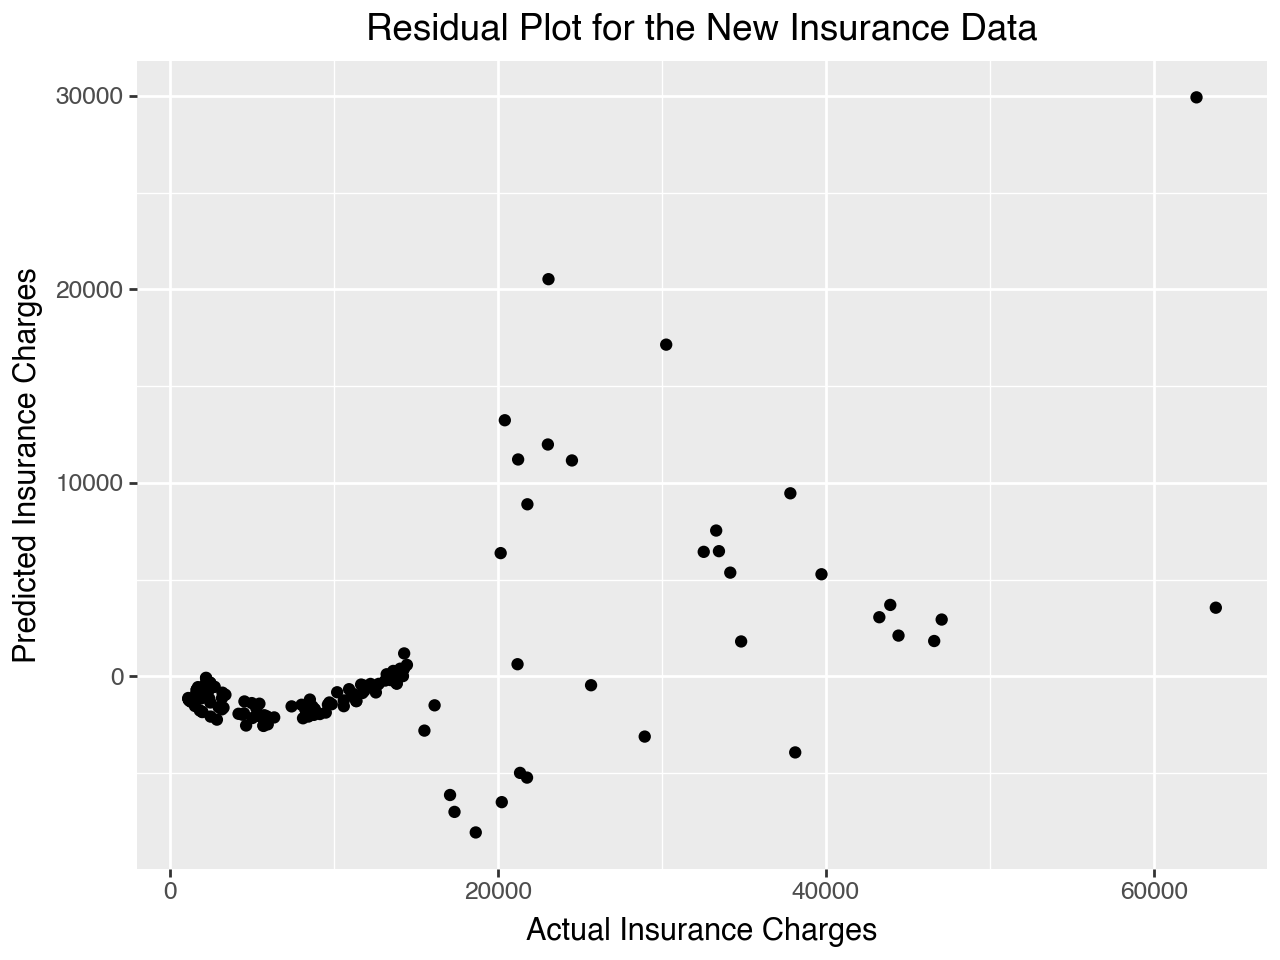

In [247]:
resid5 = y_test - y_test_pred
newinsurance['residual'] = resid5

(pt.ggplot(newinsurance, pt.aes(x='charges', y = 'residual'))
 +pt.geom_point()
 + pt.labs(title = "Residual Plot for the New Insurance Data",
           x= "Actual Insurance Charges",
           y="Predicted Insurance Charges"))

## Part 5: Full Exploration

In [248]:
#Setting our original data as the training data and the new data as the test data
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_test = newinsurance.drop("charges", axis = 1)
y_test = newinsurance["charges"]

insurance.head()

,age,sex,bmi,smoker,region,charges,age_square,Degree 12,age_smoker,bmi_smoker
0,19,female,27.900,yes,southwest,16884.92400,361,8750.448799,19,27.9
1,33,male,22.705,no,northwest,21984.47061,1089,15155.531503,0,0.0
2,32,male,28.880,no,northwest,3866.85520,1024,14407.514600,0,0.0
3,31,female,25.740,no,southeast,3756.62160,961,13320.307528,0,0.0
4,60,female,25.840,no,northwest,28923.13692,3600,17711.291000,0,0.0


In [249]:
# Model 1 with Age, BMI, Smoker, Sex as Predictors with age*smoker, bmi*smoker, and bmi*age as interactions
import sklearn as sk

ctfinal1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker", "sex"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")




ct_interact = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction1", PolynomialFeatures(interaction_only = True), ["standardize__bmi", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True), ["standardize__bmi", "standardize__age"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

X_train_dummified = ctfinal1.fit_transform(X)
X_train_dummified

lr_pipeline = Pipeline(
  [("preprocessing", ctfinal1),
   ("interactions", ct_interact),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
finalr1 = r2_score(y_test, y_test_pred)
final_test_mse1 = sk.metrics.mean_squared_error(y_test, y_test_pred)
finalresid1 = y_test - y_test_pred
newinsurance['finalresidual'] = finalresid1


print("R_Squared:", finalr1)
print("MSE:", final_test_mse1)

R_Squared: 0.8609257216130035
MSE: 21563443.737046674


In [250]:
# Model 2 with Age, Smoker, Sex and Age*Smoker as Predictors
import sklearn as sk

ctfinal2 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker", "sex"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")


ct_interact1 = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["standardize__age", "dummify__smoker_yes"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

X_train_dummified = ctfinal2.fit_transform(X)
X_train_dummified

lr_pipeline = Pipeline(
  [("preprocessing", ctfinal2),
   ("interactions", ct_interact1),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
finalr2 = r2_score(y_test, y_test_pred)
final_test_mse2 = sk.metrics.mean_squared_error(y_test, y_test_pred)


print("R_Squared:", finalr2)
print("MSE:", final_test_mse2)

R_Squared: 0.7500289588970988
MSE: 38757968.354969226


In [251]:
# Model 3 with Age, BMI, Smoker and Sex in a 3rd degree Model
import sklearn as sk

ctfinal3 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age","bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker", "sex"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ctfinal3),
   ('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
finalr3 = r2_score(y_test, y_test_pred)
final_test_mse3 = sk.metrics.mean_squared_error(y_test, y_test_pred)


print("R_Squared:", finalr3)
print("MSE:", final_test_mse3)

R_Squared: 0.8535762282223929
MSE: 22702981.465103265


In [252]:
# Model 4 with Age, BMI, and Smoker in a 3rd Degree Polynomial Model
import sklearn as sk

ctfinal4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age","bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ctfinal4),
   ('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
finalr4 = r2_score(y_test, y_test_pred)
final_test_mse4 = sk.metrics.mean_squared_error(y_test, y_test_pred)


print("R_Squared:", finalr4)
print("MSE:", final_test_mse4)

R_Squared: 0.8541587214735975
MSE: 22612665.98336761


In [253]:
# Model 5 with Age, BMI, Smoker, and Region as predictors in a 3rd degree model
import sklearn as sk

ctfinal5 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker",'region'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")



lr_pipeline = Pipeline(
  [("preprocessing", ctfinal5),
   ('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
  ("linear_regression", LinearRegression())]
)


lr_fitted = lr_pipeline.fit(X, y)


# Predictions for train and test sets
y_test_pred = lr_fitted.predict(X_test)


# Calculate MSE for training and testing data
finalr5 = r2_score(y_test, y_test_pred)
final_test_mse5 = sk.metrics.mean_squared_error(y_test, y_test_pred)


print("R_Squared:", finalr5)
print("MSE:", final_test_mse5)

R_Squared: 0.8451504687222818
MSE: 24009394.074464105


In [ ]:
model_results3 = {
    "Model": ["Final Model 1", "Final Model 2", "Final Model 3", "Final Model 4", "Final Model 5"],
    "R_Squared": [finalr1,finalr2,finalr3,finalr4,finalr5],
    "MSE": [final_test_mse1, final_test_mse2, final_test_mse3, final_test_mse4, final_test_mse5]
}

results_df3 = pd.DataFrame(model_results3)

print(results_df3)

           Model  R_Squared           MSE
0  Final Model 1   0.860926  2.156344e+07
1  Final Model 2   0.750029  3.875797e+07
2  Final Model 3   0.853576  2.270298e+07
3  Final Model 4   0.854159  2.261267e+07
4  Final Model 5   0.845150  2.400939e+07


The best model was the Final Model 1 because it had the highest R-Squared Value and the lowest MSE. This model used age, BMI, smoker, and sex as predictor variables, and I included age*smoker, bmi*smoker, and age*bmi as interaction terms. This gave us a very strong positive correlation which will be very useful to predict insurance charges.

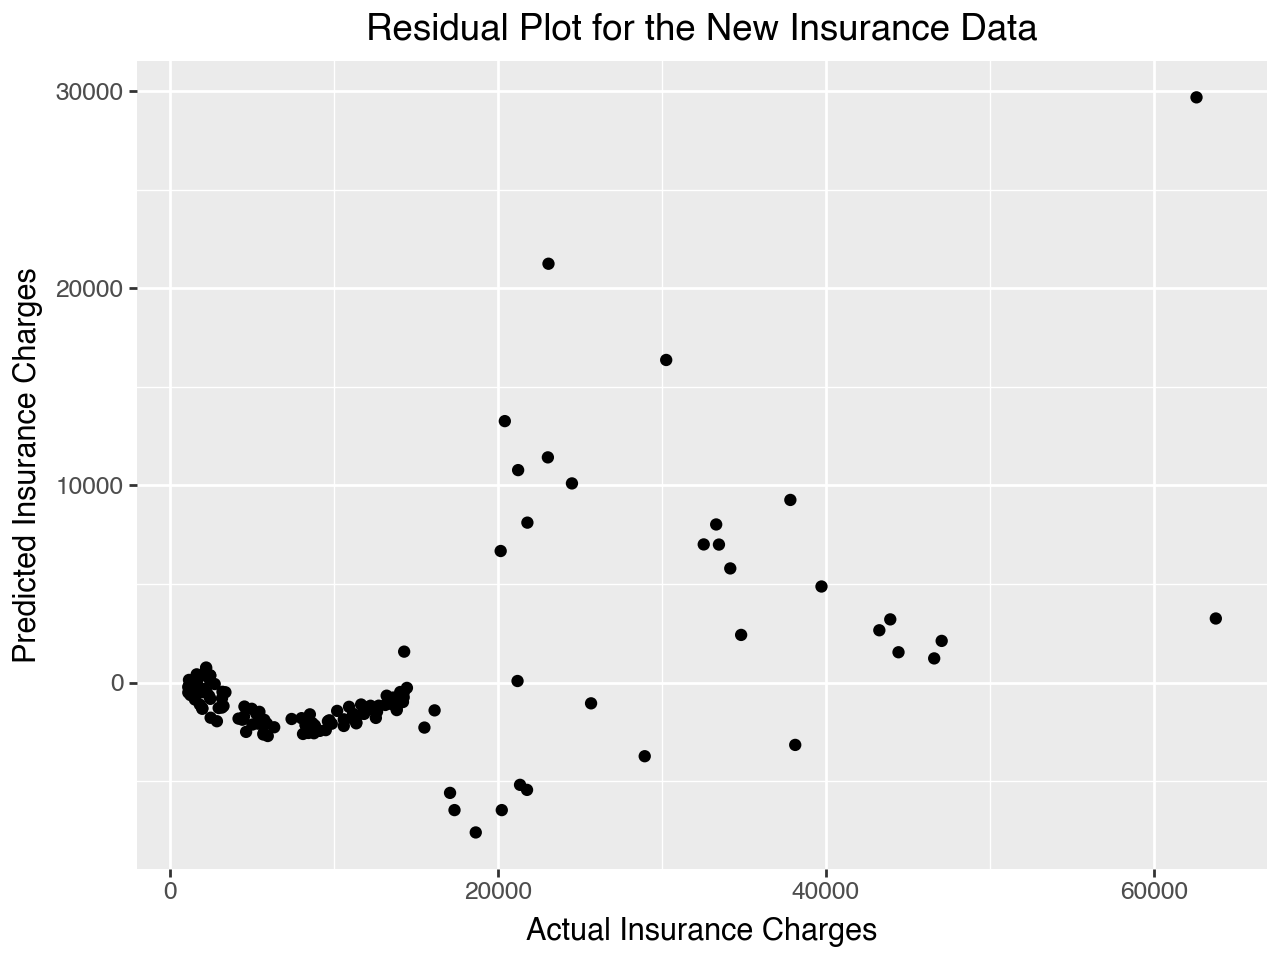

In [255]:
(pt.ggplot(newinsurance, pt.aes(x='charges', y = 'finalresidual'))
 +pt.geom_point()
 + pt.labs(title = "Residual Plot for the New Insurance Data",
           x= "Actual Insurance Charges",
           y="Predicted Insurance Charges"))

This residual plot looks very similar to the one in part 4, but it is marginally better, so we will consider it the best model.